# ESPIRiT
## An Eigenvalue Approach to Autocalibrating  Parallel MRI
#### by Martin Uecker et al.

### Theory
#### Sense

Reconstruction as a linear inverse problem with the image x to be reconstructed and the sensitivity map $S_i$ with respect to the *i* th coil,
<br>
<br>
$$y_i = \mathcal{P}\mathcal{F}\mathcal{S}_i x \quad | \quad 1 \leq i \leq N \tag{1}$$

,where $y_i$ is the received signal, which is represented by the fourier operator $\mathcal{F}$ and operator $\mathcal{P}$, which chooses only the aquired k-space locations. 

#### GRAPPA

$$x_i(r) = (P_r R_r y) ^T g_{ri} \tag{2}$$
<br>
- $R_r$ operator choosing block of k-space from all coils at postion *r*
- $P_r$ represent local sampling pattern that choose only aquired samples
- $g_{ri}$ GRAPPA weights, or kernel weights
- $y$ multicoil k-space grid concatenated into a vector and 0 filled missing data


#### Reconstruction Weights

Calibration matrix A is constructed by a sliding window over the fully sampled autocalibration (AC) signal

- calibration matrix A
- $(R_r y)^T$ inside AC is a row in A
yields the following weight conditions:
$$ y_i^{AC} = AP_r^T g_{ri} \tag{3}$$

, where $y_i$ is the data from the *i*th coil inside the AC region. <br>
The weights, which approximately solve this equation are computed by solving a regularized least squares problem.

By construction, one of the columns of $A$ is $y_i^{AC}$. Hence, we cen write $Ae_i = y_i^{AC}$, where e_i is a canonical basis vector with a "1" at the appropriate position.

$$\begin{align}
0   &= AP_r^T g_{ri} - y_i^{AC} \tag{4}\\
    &= AP_r^T gr_{ri} - Ae_i \\
    &= A(P_r^T g_{ri} - e_i) 
   \end{align} $$
<br>
This result shows that $(P_r^T g_{ri} - e_i)$ lies in the nullspace of A. Therefore, we have redundancy in A.

<img src="Fig1.jpg">

### Calibration Matrix and Null-Space Reconstruction

SVD of A:
$$ A = U \Sigma V^H$$
<br>
Where the first k columns ${v_1,...,v_k}$ of V (rows of $V^H$) form an orthonormal basis of the row space of A and <br>
the last columns of V (rows of $V^H$) form an orthonormal basis of the null space of A. 
<br>
Thus, we define $V_{\parallel}$ which spans the row space and $V_{\bot}$ which spans the null space.
<br>
**Fundamental Theorem of Linear Algebra**

<img src="Fig2.jpg">

This information leads to the following two constraints:

$$\begin{align}
V_{\parallel}V_{\parallel}^H R_r x &= R_r x \quad | \quad \forall r \tag{5a}\\
V_{\bot}^H R_r x &= 0  \quad | \quad \forall r \tag{5b}\\
P_r R_r x &= P_r R_r y \quad | \quad \forall r \tag{6}
\end{align}$$

Equations 5a and 5b are consistency with calibration and Eq. 6 is consistency with the data aquisition.

Multiplying Equation 5a with $R^H$ from the left and summing over *r*, Eq. 5a can be reformulated to <br> <br>
$$ \underbrace{M^{-1} \sum_{r} R_r^H V_{\parallel} V_{\parallel}^H R_r}_{\mathcal{W}} x = x , \tag{7}$$
where $M$ represent $\sum_{r} R_r^H R_r$and equals the number of samples in each patch.

Rewriting the two constraints yields
$$\begin{align}
\mathcal{W}x &= x \tag{8a}\\
\mathcal{P}x &= \mathcal{P}y, \tag{8b}
\end{align}$$
where $\mathcal{P}$ is again the operator selecting the aquired samples of the full grid.

### Sensitivity Maps as an Eigenvalue Problem
Eigenvalue Equation
$$ Av = \lambda v$$

Reconstruction $x$ must satisfy $Wx = x$, thus $x$ belongs to the subspace spanned by the eigenvectors of $W$ corresponding to the eigenvalue "1".

Now writing $x$ in terms of the k-space of the original image weighted by the coil sensitivities, we get
<br>
<br>
$$ x = \mathcal{F}\mathcal{S}m, \tag{9}$$
<br>
where $S=[S_1 S_2 ... S_N]^T$ is a vector of stacked coil sensitivities.
<br>
<br>
Assuming this is indeed a solution yields
$$ \mathcal{W}\mathcal{F}\mathcal{S}m = \mathcal{F}\mathcal{S}m \tag{10}.$$


Now, applying the inverse Fourier transform on both sides, shows that the vector of coil images $\mathcal{S}m$ is an eigenvector of $\mathcal{F}^{-1}\mathcal{W}\mathcal{F}$ with eigenvalue "1":
$$\mathcal{F}^{-1}\mathcal{W}\mathcal{F}\mathcal{S}m = \mathcal{S}m \tag{11}$$
<br>
If we  perform the eigenvalue decomposition on $\mathcal{W}$ we should be able to get the sensitivities explicitly.

Since, $\mathcal{W}$ is a positive semidefinite matrixvalued convolution in k-space, it can be decoupled as a point-wise positive semidefinite matrix operation in the image domain:
$$\mathcal{F}^{-1}\mathcal{W}\mathcal{F}|_q = \mathcal{G}_q, \tag{12}$$
at point *q*.

<img src="Fig3.jpg">

$\mathcal{G}_q = G_q^H G_q$

The sensitivity maps are found by the eigenvalue decomposition of all $\mathcal{G}_q$'s choosing only the eigenvectors with corresponding eigenvalue "1". At positions, where no eigenvalue "=1" was found, the sensitivities are set to zero. <br>
For one eigenvalue "=1" at each position, the eigenvectors are the solution to the SENSE reconstruction problem.

<img src="Fig2.jpg">

### Implementation using Soft SENSE

Errors in the aquisition data may lead to additional eigenvectors with eigenvalue "1" and different sets of sensitivity maps $S^j$:
<br>
<br>
$$ y_i = \mathcal{P}\mathcal{F} \sum_{j=1}^{M} \mathcal{S}_i^j m^j, \tag{13}$$
<br>
which is a reformulation of Equation 1 for multiple image components and sensitivity maps called "soft SENSE".

This problem can be formulated as the optimization of a functional:
$$ J(m^1,...,m^M) = \sum_{i=1}^{N}||y_i - \mathcal{P}\mathcal{F} \sum_{j=1}^{M}S_i^j x^j||_2^2 + \alpha \sum_{j=1}^{M}Q(x^j), \tag{14}$$

where Q is the regularization term and can be replaced by the $\mathcal{l}_1$ norm with a wavelet transform $\Phi$, using $Q(m)= ||\Phi m||_1^2$ for example. The reformulation yields $\mathcal{l}_1-ESPIRiT$, which is useful for compressed sensing reconstruction of randomly undersampled data.

In [23]:
using MAT
using FFTW
using PyPlot
using LinearAlgebra
using Augmentor
using PyCall
sigpy = pyimport("sigpy.mri")
sigpyapp = pyimport("sigpy.app");

In [24]:
#https://github.com/mikgroup/phase_cycling/blob/master/utils/fft2c.m
fft2c(im) = fftshift(fft(fftshift(im))); #centered 2D fourier transform

#https://github.com/mikgroup/phase_cycling/blob/master/utils/zpad.m
function zpad(x, sx,sy,sz) # zero padding around the center of a 3D matrix
    s = [sx,sy,sz];
    m = size(x)
    if length(m) < length(s)
        m = [m, ones(1,length(s)-length(m))];
    end
    
    if sum(m==s)==length(m)
        res = x;
        return res;
    end

    res = zeros(ComplexF64,sx,sy,sz);

    res[115-2:115+3, 90-2:90+3,:] = x; # assumption that the kernel is 6x6
    return res;
end

zpad (generic function with 1 method)

In [25]:
#https://github.com/mikgroup/phase_cycling/blob/master/utils/im2row.m
function im2row(im, winSize)
#res = im2row(im, winSize)
    sx,sy,sz = size(im);

    res = zeros(ComplexF64,(sx-winSize[1]+1)*(sy-winSize[2]+1),prod(winSize),sz);
    count=0;
    for y=1:winSize[2]
        for x=1:winSize[1]
            count = count+1;
            res[:,count,:] = reshape(im[x:sx-winSize[1]+x,y:sy-winSize[2]+y,:],(sx-winSize[1]+1)*(sy-winSize[2]+1),1,sz);
        end
    end
        return res
end

im2row (generic function with 1 method)

In [26]:
#https://github.com/mikgroup/phase_cycling/blob/master/ESPIRiT/dat2Kernel.m
function dat2Kernel(data, kSize)
#Function to perform k-space calibration step for ESPIRiT and create
# k-space kernels. Only works for 2D multi-coil images for now.  
# 
# Inputs: 
#       data - calibration data [kx,ky,coils]
#       kSize - size of kernel (for example kSize=[6,6])
#
# Outputs: 
#       kernel - k-space kernels matrix (not cropped), which correspond to
#                the basis vectors of overlapping blocks in k-space
#       S      - (Optional parameter) The singular vectors of the
#                 calibration matrix
    sx,sy,nc = size(data);
    imSize = [sx,sy] ;

    tmp = im2row(data,kSize); 
    tsx,tsy,tsz = size(tmp);
    A = reshape(tmp,tsx,tsy*tsz);

    U,S,V = svd(A);

    kernel = reshape(V,kSize[1],kSize[2],nc,size(V,2));
    
    return kernel, S
end;

In [27]:
#https://github.com/mikgroup/phase_cycling/blob/master/utils/ifft2c.m
function ifft2c(x) #inverse centered 2D fourier transform

    S = size(x);
    fctr = S[1]*S[2];

    x = reshape(x,S[1],S[2],prod(S[3:end]));

    res = zeros(ComplexF64, size(x));
    for n=1:size(x,3)
        res[:,:,n] = sqrt(fctr)*fftshift(ifft(ifftshift(x[:,:,n])));
    end


    res = reshape(res,S);
        return res
end;

In [28]:
mri_data = matread("brain.mat");
kspace = mri_data["ksp"]

230×180×8 Array{Complex{Float64},3}:
[:, :, 1] =
   0.0122737+0.00348057im   …   -0.00601181+0.00727717im
 -0.00257841+0.00905412im        -0.0160852-0.000805653im
 -0.00217939-0.0118633im          0.0116361+0.00293189im
  4.82181e-5+0.0122812im         0.00355107+0.0125239im
 -0.00457308-0.00223111im         0.0106102-0.0212542im
 -0.00529561-0.00667764im   …  -0.000196668-0.000761317im
  0.00473438+0.00320557im       -0.00480436-0.00534424im
   0.0101955-0.00541172im       -0.00514005-0.00255804im
   0.0124701-0.0106492im         -0.0053245+0.00534991im
 -0.00273134+0.00889459im       -0.00519717+0.0129461im
  -0.0116009+0.00638695im   …      0.008317-0.00049807im
   0.0101527-0.00703347im        0.00319002+0.00678747im
 0.000700112+0.00447613im       -0.00546619+0.00742248im
            ⋮               ⋱  
 0.000620847-0.00724837im       -0.00965273+0.00677465im
   0.0100623+0.00746831im        0.00059981+0.00726085im
   0.0090144-0.00712161im   …     0.0080088+0.00863505im
 -0.0031

### Individual Coil Images

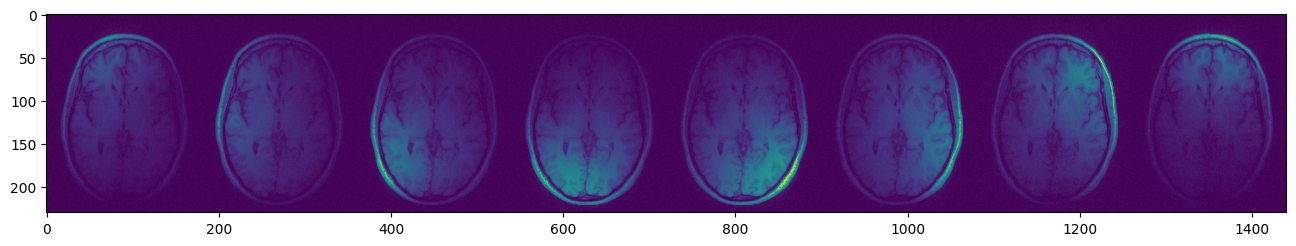

(230, 180, 8)

PyObject <bound method Artist.set of <Figure size 1600x1600 with 1 Axes>>

In [29]:
image = ifft2c(kspace)
print(size(image))
imagedisp = reshape(image, (230, 180*8))
fig = figure(figsize=(16,16))
imshow(abs.(imagedisp[:,:]));
fig.set

In [30]:
sx,sy,Nc = size(kspace);
ncalib = 24; # use 24 calibration lines to compute compression
ksize = [6,6]; # kernel size
# Threshold for picking singular vercors of the calibration matrix
# (relative to largest singlular value.

eigThresh_1 = 0.02;

#threshold of eigen vector decomposition in image space.
eigThresh_2 = 0.8;

#crop a calibration area
calib = augment(kspace, CropSize(ncalib, ncalib, Nc)); #24x24x8
#calib2 = kspace[115-11:115+12, 90-11:90+12,:]; # FYI how the cropping works, calib == calib2

In [31]:
k,S = dat2Kernel(calib,ksize);

### Define the autocalibration Matrix and compute the svd

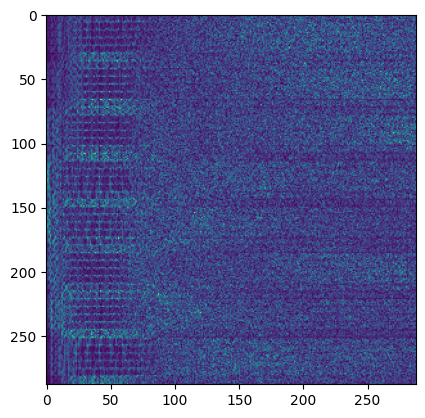

PyObject <matplotlib.image.AxesImage object at 0x7f96ea2693d0>

In [32]:
kdisp = reshape(k, (ksize[1]*ksize[2]*Nc,ksize[1]*ksize[2]*Nc))
imshow(abs.(kdisp))

In [33]:
biggest_sigmas = S[S .>= S[1] *eigThresh_1]
idx = size(biggest_sigmas, 1)
print(idx)

61

### Threshold the singular values to separate V into **$V_{\parallel}$** and **$V_{\bot}$**

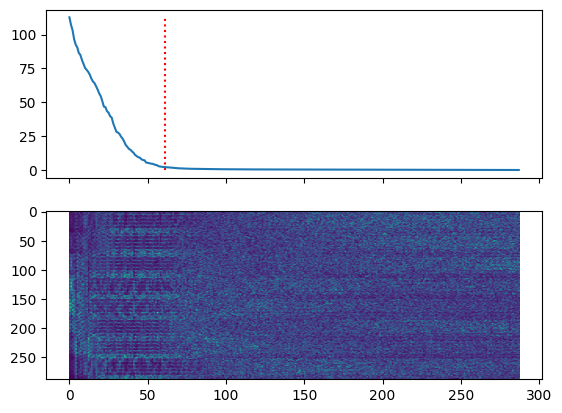

In [34]:
fig, (ax1, ax2) = subplots(2,1, sharex = true)
ax1.plot(S)
ax1.vlines(idx, 0,S[1], color="red", linestyles="dotted")
ax2.imshow(abs.(kdisp), aspect ="auto");

In [35]:
#https://github.com/mikgroup/phase_cycling/blob/master/ESPIRiT/kernelEig.m
function kernelEig(kernel, imSize)
# INPUTS:
#           kernel - k-space kernels computed with dat2Kernel (4D)
#           imSize - The size of the image to compute maps for [sx,sy]
#
# OUTPUTS:
#           EigenVecs - Images representing the Eigenvectors. (sx,sy,Num coils,Num coils)
#           EigenVals - Images representing the EigenValues. (sx,sy,numcoils )
#                       The last are the largest (close to 1)
    nc = size(kernel,3);
    nv = size(kernel,4);
    kSize = [size(kernel,1), size(kernel,2)];
    # "rotate kernel to order by maximum variance"
    k = permutedims(kernel,[1,2,4,3]);

    k =reshape(k,(kSize[1]*kSize[2]*nv,nc));
  
    u,s,v = svd(k);

    
    k = k*v; # Why do we multiply here?

    kernel = reshape(k,(kSize[1], kSize[2],nv,nc)); 

    kernel = permutedims(kernel,[1,2,4,3]);
    KERNEL = zeros(ComplexF64,imSize[1], imSize[2],  size(kernel,3), size(kernel,4)); #compute kernel in image space
    
    for n=1:size(kernel,4)
        KERNEL[:,:,:,n] = fft2c(zpad(conj(kernel[end:-1:1,end:-1:1,:,n])*sqrt(imSize[1]*imSize[2]),
                imSize[1], imSize[2], size(kernel,3))); 
    end
    KERNEL = KERNEL./sqrt(prod(kSize));

    EigenVecs = zeros(ComplexF64, imSize[1], imSize[2], nc, min(nc,nv));
    EigenVals = zeros( imSize[1], imSize[2], min(nc,nv));
    
    i2s = CartesianIndices((1:imSize[1],1:imSize[2]));
    for n=1:prod(imSize)
    
        ind = i2s[n]

        mtx = KERNEL[ind,:,:]

        #[C,D] = eig(mtx*mtx');
        C,D,V = svd(mtx);
        
        ph = exp.(-1im*angle.(C[1,:]));
        ph = repeat(ph', 8)
        C = v*(C.*ph);
        D  = real.(D)
        EigenVals[ind,:] = D[end:-1:1];
        EigenVecs[ind,:,:] = C[:,end:-1:1];
    end
    return EigenVecs, EigenVals
end;

In [36]:
M,W = kernelEig(k[:,:,:,1:idx],[sx,sy]);
max, max_idx = findmax(W)
W = W./max;

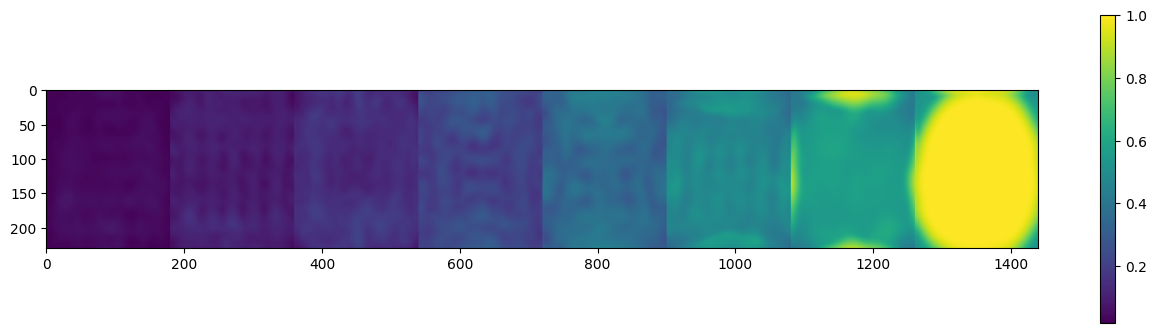

PyObject <matplotlib.colorbar.Colorbar object at 0x7f97568b93d0>

In [37]:
Wdisp = reshape(W, (size(W,1), size(W,2)*size(W,3)));
fig, ax = subplots(figsize=(16,4))
mappable = ax.imshow(abs.(Wdisp));
colorbar(mappable, ax=ax)
title("Eigenvalues increasing order")

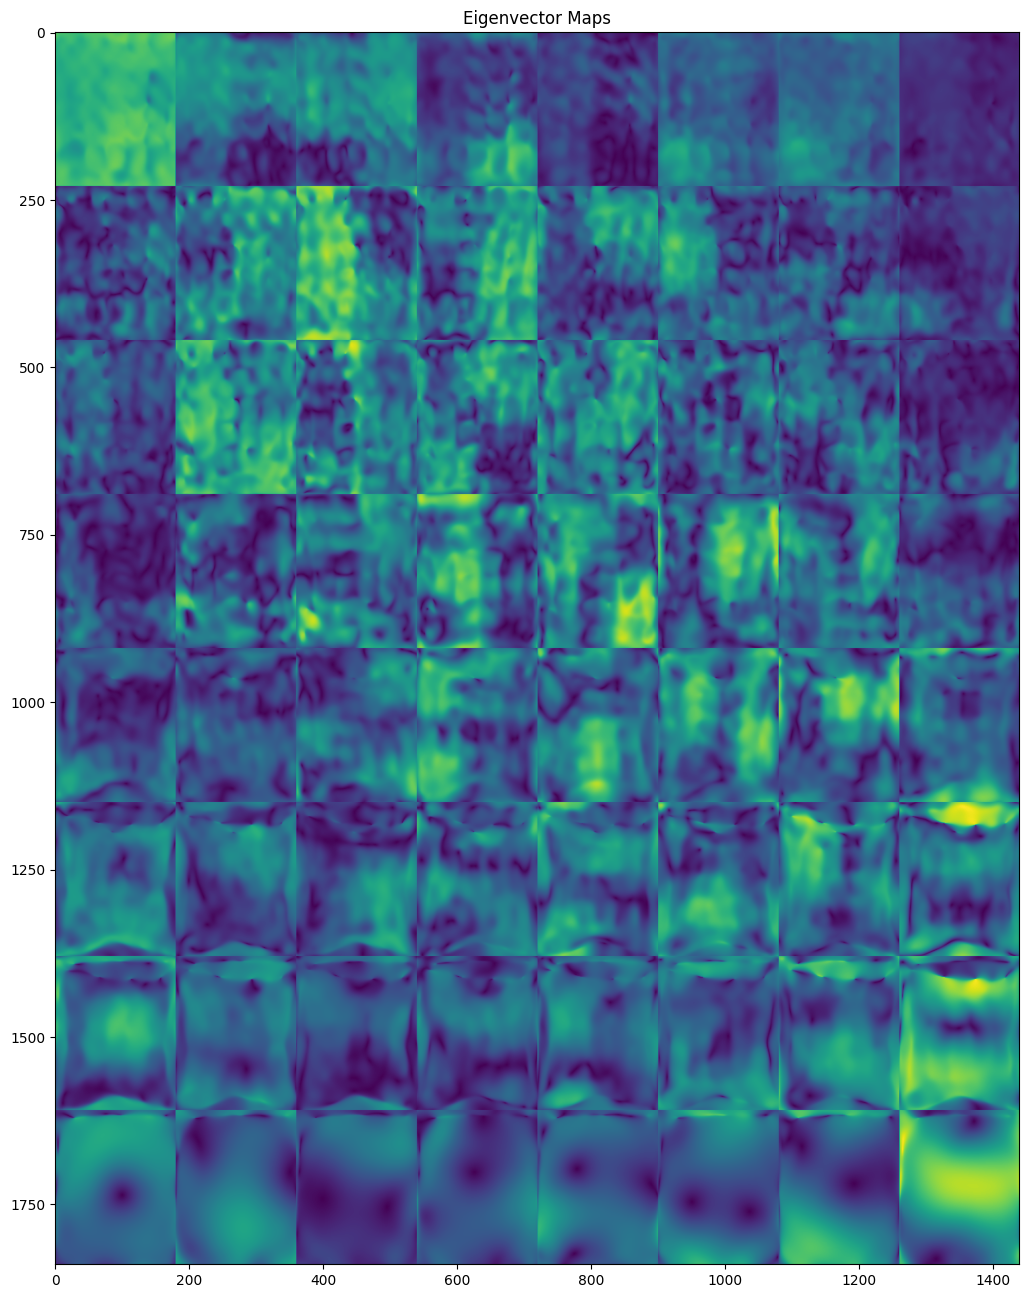

In [51]:
Mdisp = vcat([M[:,:,:,i] for i=1:Nc]...);
Mdisp = reshape(Mdisp, (size(Mdisp,1), size(Mdisp,2)*size(Mdisp,3)));
fig = figure(figsize=(16,16))
imshow(abs.(Mdisp))
title("Eigenvector Maps");

In [39]:
W_thresh2 = abs.(W[:,:,end]).>eigThresh_2

#crop maps with eigenvalue map
maps = M[:,:,:,end].*repeat(abs.(W[:,:,end]).>eigThresh_2,outer=(1,1,Nc)); 
recon_weights = repeat(W[:,:,end], outer=(1,1,Nc));

size(M[:, :, :, end]) = (230, 180, 8)


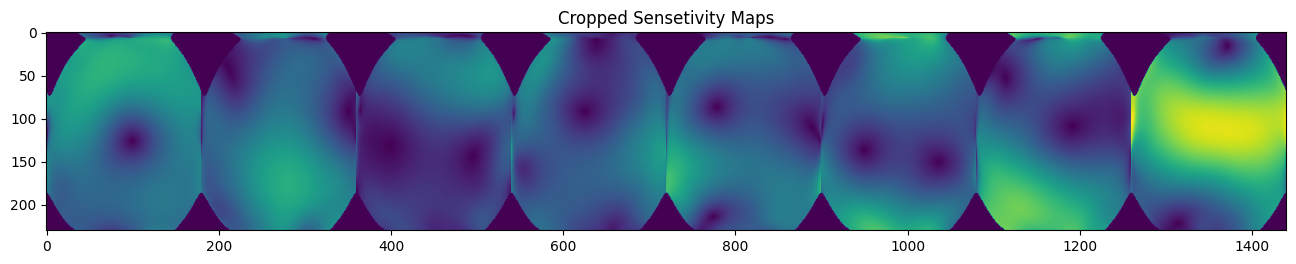

In [50]:
dispMaps = reshape(maps, size(maps,1), size(maps,2)*Nc)
fig = figure(figsize=(16,16))
imshow(abs.(dispMaps[:,:]));
title("Cropped Sensetivity Maps");

### SENSE Reconstruction

In [41]:
#sigpy SENSE reconstruction
weights = sigpy.app._estimate_weights(kspace, recon_weights, coord= nothing)
A = sigpy.linop.Sense(mps=maps, weights= weights, ishape=(230,180,8))
recon = sigpyapp.LinearLeastSquares(A, kspace, lamda=0.02, show_pbar=true).run();

LinearLeastSquares: 100%|████| 100/100 [00:07<00:00, 13.69it/s, resid=7.26E-14]

In [42]:
opt_recon = sqrt.(sqrt.(sum(abs.(image), dims=3).^2));
recon = sqrt.(sqrt.(sum(abs.(recon), dims=3).^2));

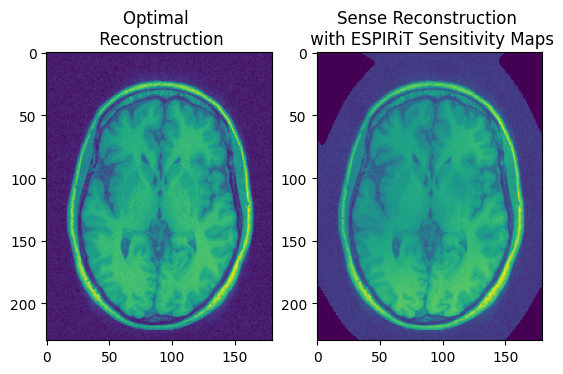

In [45]:
fig, (ax1, ax2) = subplots(1,2)
ax1.imshow(opt_recon[:,:]);
ax1.set_title("Optimal \n Reconstruction")
ax2.imshow(abs.(recon[:,:]))
ax2.set_title("Sense Reconstruction \n with ESPIRiT Sensitivity Maps");

## SURE-based Automatic Parameter Selection for ESPIRiT Calibration

### Parameter choices in ESPIRiT

- kernel size
- signal Threshhold (eig_thresh_1)
- eigenvalue threshold (eig_thresh_2)

**Denoted as**

- kernel size (k)
- subspace size (w)
- eiigenvalue crop threshold (c)